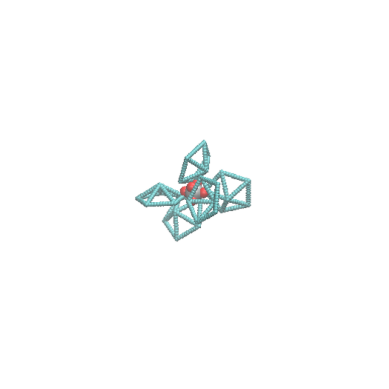

Accuracy: 0.32222222222222224
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.32      0.37        68
           1       0.29      0.25      0.27        60
           2       0.30      0.30      0.30        69
           3       0.27      0.35      0.30        55
           4       0.33      0.39      0.36        54
           5       0.33      0.33      0.33        54

    accuracy                           0.32       360
   macro avg       0.33      0.32      0.32       360
weighted avg       0.33      0.32      0.32       360

Confusion Matrix:
[[22 18 12  7  7  2]
 [11 15 10 11  8  5]
 [13  5 21 12  6 12]
 [ 2  2 13 19  9 10]
 [ 2  7  4 12 21  8]
 [ 0  5  9 10 12 18]]


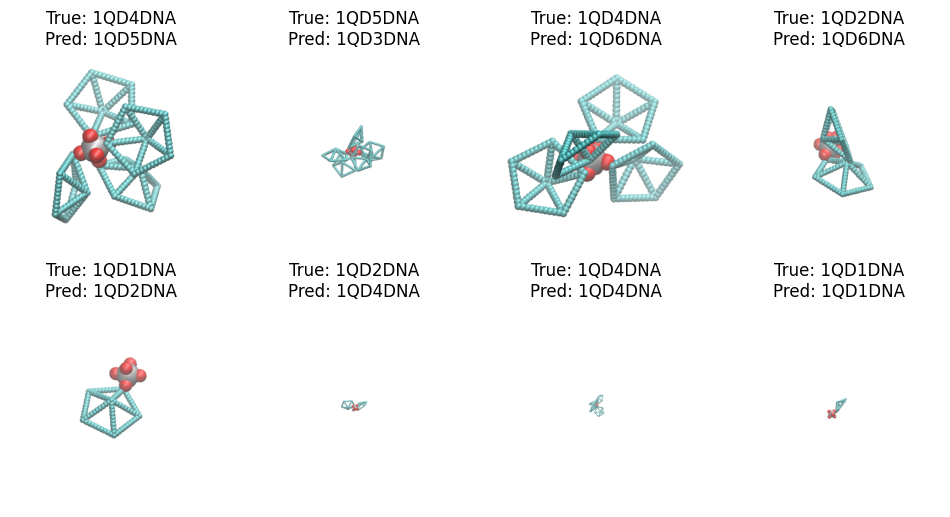

Image: unknown01.png, Predicted class: 1QD4DNA
Image: unknown02.png, Predicted class: 1QD5DNA
Image: unknown03.png, Predicted class: 1QD3DNA
Image: unknown04.png, Predicted class: 1QD5DNA
Image: unknown05.png, Predicted class: 1QD4DNA
Image: unknown06.png, Predicted class: 1QD5DNA
Image: unknown07.png, Predicted class: 1QD3DNA
Image: unknown08.png, Predicted class: 1QD1DNA
Image: unknown09.png, Predicted class: 1QD4DNA
Image: unknown10.png, Predicted class: 1QD5DNA
Image: unknown11.png, Predicted class: 1QD1DNA
Image: unknown12.png, Predicted class: 1QD3DNA
Image: unknown13.png, Predicted class: 1QD4DNA
Image: unknown14.png, Predicted class: 1QD4DNA
Image: unknown15.png, Predicted class: 1QD6DNA
Image: unknown16.png, Predicted class: 1QD3DNA
Image: unknown17.png, Predicted class: 1QD3DNA
Image: unknown18.png, Predicted class: 1QD4DNA
Image: unknown19.png, Predicted class: 1QD6DNA
Image: unknown20.png, Predicted class: 1QD4DNA


In [4]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to load images from folder
def load_images_from_folder(folder):
    images = []
    labels = []
    for subdir, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = Image.open(os.path.join(subdir, file)).convert('RGB')
                img = img.resize((500, 500))
                images.append(np.array(img))
                label = os.path.basename(subdir)
                labels.append(label)
    return np.array(images), np.array(labels)

# Specify image directories
base_image_directory = '../../simulation'
TEM_image_directory = '../../TEM'
image_path = '../../predictTEM'

# Load image data
images, labels = load_images_from_folder(base_image_directory)

# Display a randomly loaded image (optional)
random_image_index = random.randint(0, len(images) - 1)
random_image = images[random_image_index]
plt.imshow(random_image)
plt.axis('off')
plt.show()

# Preprocess data: flatten image data into 1D vectors
n_samples, height, width, channels = images.shape
data = images.reshape((n_samples, height * width * channels))

# Convert labels to numerical values
label_to_index = {label: idx for idx, label in enumerate(np.unique(labels))}
indexed_labels = np.array([label_to_index[label] for label in labels])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, indexed_labels, test_size=0.5, random_state=42)

# Build decision tree model
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Display some prediction results
def show_images(images, labels, predictions, num_images=8):
    _, axes = plt.subplots(2, 4, figsize=(12, 6))
    for ax, image, label, prediction in zip(axes.flatten(), images, labels, predictions):
        ax.set_axis_off()
        ax.imshow(image)
        ax.set_title(f'True: {label}\nPred: {prediction}')
    plt.show()

# Display some test samples
sample_indices = np.random.choice(len(X_test), 8, replace=False)
sample_images = X_test[sample_indices].reshape((-1, height, width, channels))
sample_labels = [list(label_to_index.keys())[label] for label in y_test[sample_indices]]
sample_predictions = [list(label_to_index.keys())[pred] for pred in y_pred[sample_indices]]
show_images(sample_images, sample_labels, sample_predictions)

# Save the trained model
import joblib
joblib.dump(clf, 'decision_tree_model.pkl')

# Load and use the model for prediction
def prepare_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = image.resize((500, 500))
    image = np.array(image).reshape(1, -1)  # Flatten to 1D vector and add batch dimension
    return image

def predict_image(image_path):
    image_vector = prepare_image(image_path)
    prediction = clf.predict(image_vector)
    class_name = list(label_to_index.keys())[prediction[0]]
    return class_name

# Example usage
image_files = sorted([f for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))])

# Process each image
for img_file in image_files:
    img_path = os.path.join(image_path, img_file)
    class_name = predict_image(img_path)
    print(f'Image: {img_file}, Predicted class: {class_name}')

